# Assignment - Drone delivery system
#### Marja Satukangas 23.1.2021

In near future, drones (unmanned aerial vehicles, see the image above) may carry out routine delivery tasks. To get an idea of the concept, have a look at Amazon Prime Air web pages.

The goal of this assignment is to find ideal locations for a set of drone depots, based on the coordinates of the
clients.

## Preprosessing data and importing libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

#read data
data = pd.read_csv("C:/Users/Marja/Downloads/drone_delivery_v1.csv", sep=';')
df = pd.DataFrame(data)
df.head()


,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298


In [2]:
#removing id-column
df.drop(columns=['clientid'], inplace=True)
df.head()

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298


In [3]:
df.describe()

,x,y
count,5956.000000,5956.000000
mean,508.823177,427.554772
std,271.061462,289.044640
min,0.017692,0.043285
25%,282.582920,170.079921
50%,518.100892,397.786441
75%,727.156497,669.982518
max,999.533215,999.731720


In [4]:
colnames = df.columns.values
print(colnames)

['x' 'y']


In [5]:
#normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=colnames)
df_scaled

,x,y
0,0.420414,-0.908923
1,-0.341154,0.701123
2,-0.797259,0.483628
3,0.842640,-0.904189
4,0.116781,0.883528
...,...,...
5951,1.195527,0.654994
5952,-0.981737,0.217183
5953,-1.476292,1.146214
5954,1.086295,0.011023


## 1. Visualizing clients locations

<AxesSubplot:xlabel='x', ylabel='y'>

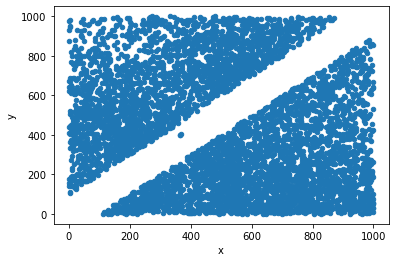

In [6]:
df.plot.scatter(x="x", y="y")

## 2. K-means clustering

In [14]:
#number of clusters
num_clusters = 10

In [15]:
%%time

#clustering
kmeans = cluster.KMeans(n_clusters=num_clusters)
kmeans.fit(df_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.4910291  -0.19488379]
 [ 1.36062158  0.58715398]
 [ 0.59585904 -0.14428434]
 [ 0.52800735  1.6112474 ]
 [-1.32717069  1.25964817]
 [-0.7684238  -1.16963335]
 [ 1.27093667 -0.99128687]
 [-0.91122738  0.3561164 ]
 [ 0.12732937 -0.95914123]
 [-0.20940237  1.19175907]]
Wall time: 555 ms


In [16]:
#centroids to dataframe
df_centroids_scaled = pd.DataFrame(centroids, columns=colnames)

#Scale centroids to correspond the original data scale and print
df_centroids = pd.DataFrame(scaler.inverse_transform(df_centroids_scaled), columns=colnames)
df_centroids

,x,y
0,104.696579,371.229387
1,877.604290,597.254236
2,670.324041,385.853657
3,651.933606,893.238098
4,149.108551,791.618755
5,300.550585,89.506903
6,853.296209,141.052669
7,261.845286,530.479668
8,543.334365,150.343416
9,452.067029,771.997424


## 3. Attaching closest depots to the clients data

In [17]:
depots = kmeans.predict(df_scaled)
print(depots)


[8 9 7 ... 4 2 8]


In [18]:
kmeans_df=df.copy()
kmeans_df.insert(2, 'depot', depots)

In [20]:
kmeans_df.head(10)

,x,y,depot
0,622.771572,164.857623,8
1,416.357298,630.193634,9
2,292.735020,567.333231,7
3,737.211288,166.225676,6
4,540.475375,682.912298,9
5,535.469492,318.439661,2
6,640.380050,870.833221,3
7,235.772075,359.048203,0
8,481.896884,661.491838,9
9,730.032789,312.177817,2


## 4. Scatterplot

### Scatterplot for 3 depots

Wall time: 121 ms


<AxesSubplot:xlabel='x', ylabel='y'>

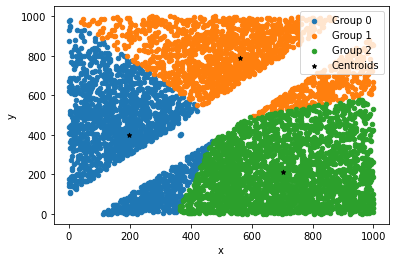

In [13]:
%%time

#Scatterplot for 3 depots (the number of clusters should be changed to 3 and above cells should be run again)

ax = kmeans_df.loc[kmeans_df['depot'] == 0].plot.scatter(x="x", y="y", color='C0', label="Group 0")

for i in range(1,num_clusters):
    color = 'C{}'.format(i)
    group = kmeans_df.loc[kmeans_df['depot'] == i]
    label = 'Group {}'.format(i)
    group.plot.scatter(x="x", y="y", color=color, label=label, ax=ax)


df_centroids.plot.scatter(x="x", y="y", marker='*', color='black', label='Centroids', ax=ax)

### Scatterplot for 10 depots

Wall time: 384 ms


<AxesSubplot:xlabel='x', ylabel='y'>

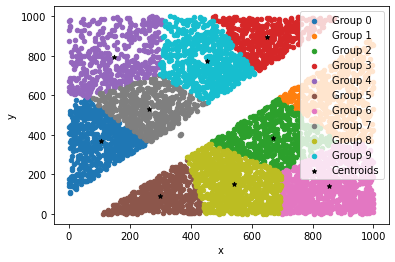

In [21]:

%%time

#Scatterplot for 10 depots (the number of clusters should be changed and above cells besides the one above should be run again)

ax = kmeans_df.loc[kmeans_df['depot'] == 0].plot.scatter(x="x", y="y", color='C0', label="Group 0")

for i in range(1,num_clusters):
    color = 'C{}'.format(i)
    group = kmeans_df.loc[kmeans_df['depot'] == i]
    label = 'Group {}'.format(i)
    group.plot.scatter(x="x", y="y", color=color, label=label, ax=ax)


df_centroids.plot.scatter(x="x", y="y", marker='*', color='black', label='Centroids', ax=ax)


## 5. 

In [22]:
#Optimal locations for 10 depots:
df_centroids

,x,y
0,104.696579,371.229387
1,877.604290,597.254236
2,670.324041,385.853657
3,651.933606,893.238098
4,149.108551,791.618755
5,300.550585,89.506903
6,853.296209,141.052669
7,261.845286,530.479668
8,543.334365,150.343416
9,452.067029,771.997424


Computing time is not very long with eather number of depots but it doubles when number of depots increases from 3 to 10.

# 6. Agglomerative clustering

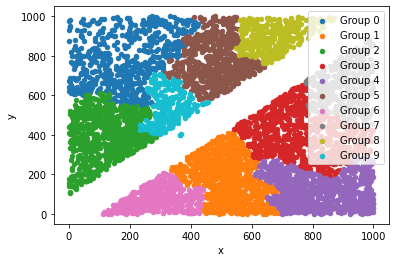

In [23]:
#clustering

num_clusters=10

a_clustering = cluster.AgglomerativeClustering(n_clusters=num_clusters)
a_clustering.fit(df_scaled) 

#inserting depots to a copy of original table
agg_df=df.copy()
agg_df.insert(2, 'depot', a_clustering.labels_)


#scatterplot
ax = agg_df.loc[agg_df['depot'] == 0].plot.scatter(x="x", y="y", color='C0', label="Group 0")

for i in range(1,num_clusters):
    color = 'C{}'.format(i)
    group = agg_df.loc[agg_df['depot'] == i]
    label = 'Group {}'.format(i)
    group.plot.scatter(x="x", y="y", color=color, label=label, ax=ax)


#### Observations: 
Clusters differentiate a bit from clusters created with k-means clustering